In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler

In [321]:
df = pd.read_csv("new_mapping_1.csv")

In [82]:
df = pd.read_csv("ananlysis_etype.csv")

In [322]:
df.head()

,bbp_name,long_name,m_type,e_type,binned_complexity,horizontal_complexity,level,length_soma,avg_length_dendrite,avg_length_axon,...,length_dendrite_var,length_axon_var,count_axon,count_dendrite,avg_diameter_dendrite,avg_diameter_axon,var_diameter_dendrite,var_diameter_axon,k_rank,Unnamed: 21
0,bbp106,L5_BP_bNAC219_1,BP,bNAC,2.463375e+05,533,5,16.400059,54.280821,41.027527,...,3615.736059,3605.705852,86.0,62.0,0.568563,0.314535,0.028310,0.008132,9,NaN
1,bbp088,L4_MC_cNAC187_1,MC,cNAC,2.794893e+06,2394,4,20.211972,69.907236,76.574782,...,4956.605625,4961.408367,335.0,23.0,0.736062,0.287501,0.177218,0.002383,9,NaN
2,bbp179,L6_LBC_bNAC219_1,LBC,bNAC,9.180044e+06,2248,6,21.176644,79.976831,61.060177,...,8932.897971,3127.888469,118.0,41.0,0.803433,0.210832,0.376408,0.024343,12,NaN
3,bbp165,L6_BTC_cNAC187_1,BTC,cNAC,3.491253e+06,2338,6,26.102603,86.973535,49.967228,...,8238.752281,4402.374530,404.0,69.0,0.565448,0.150918,0.357533,0.000264,11,NaN
4,bbp143,L5_NBC_cSTUT189_1,NBC,cSTUT,1.000132e+06,1833,5,22.976744,63.952439,59.603065,...,5339.165916,4117.107898,468.0,68.0,0.610073,0.189003,0.109277,0.031438,10,NaN


In [323]:
len(df)

169

In [324]:
import pickle
with open('new_pick.pickle', 'rb') as handle:
    curr_mappings = pickle.load(handle)

In [325]:
curr_mappings['L23_BTC_cAC'].keys()

dict_keys(['length_soma', 'length_dendrite', 'length_axon', 'diameter_axon', 'diameter_dendrite'])

In [326]:
tracker = {}
for elem in curr_mappings.keys():
    string = elem
    lowercase_letters = [c for c in range(len(string)) if string[c].islower()]
    last_elem = lowercase_letters[len(lowercase_letters)-1]
    e_type = string[last_elem:]
    m_type = string[string.find("_")+1:last_elem-1]
    val = string[:string.find("_")]
    size = len(val)
    for i, row1 in df.iterrows():
        if (val in row1['long_name']):
            tracker[row1['bbp_name']] = curr_mappings[elem]

In [3]:
tarcked2 = {'bbp200': 6296.9851544067005,  'bbp082': 31806.141629291236,  'bbp045': 11399.568436870844,  'bbp189': 28432.088451897853,  'bbp151': 25764.85348763872,  'bbp071': 28247.676771820807,  'bbp145': 6136.23868730572,  'bbp081': 31539.471877800876,  'bbp149': 19006.82973723589,  'bbp052': 17736.90682169943,  'bbp182': 22821.248008202485,  'bbp132': 25368.914169178253,  'bbp002': 34462.86086747983,  'bbp009': 15457.068030145083,  'bbp174': 8961.238123929643,  'bbp143': 21498.025851338465,  'bbp128': 24513.3516673022,  'bbp093': 32592.105909605798,  'bbp201': 6235.191869283883,  'bbp027': 32895.6319210055,  'bbp023': 25557.851547437447,  'bbp101': 18333.49646781879,  'bbp048': 12667.256865902438,  'bbp068': 22367.92203688414,  'bbp084': 31790.781343348848,  'bbp126': 18992.152957490907,  'bbp001': 18368.813244454075,  'bbp119': 5115.420769909203,  'bbp036': 13712.528796061926,  'bbp147': 6128.720931869325,  'bbp195': 19578.76520753655,  'bbp122': 10177.834919332268,  'bbp202': 11769.746430595571,  'bbp099': 11809.542532800851,  'bbp047': 23871.900647916522,  'bbp171': 10077.637424592614,  'bbp079': 13618.535328695783,  'bbp181': 43708.01997249402,  'bbp114': 34401.388868819464,  'bbp192': 19192.750188574,  'bbp005': 14741.232377834587,  'bbp136': 42191.06915052174,  'bbp127': 33855.83268314025,  'bbp057': 9405.864291108468,  'bbp089': 22739.859254026967,  'bbp121': 9964.80860549124,  'bbp112': 37695.84243819461,  'bbp175': 21024.33105969355,  'bbp042': 24920.22916595236,  'bbp092': 27491.836790691017,  'bbp180': 45083.564266553425,  'bbp096': 11590.856492610888,  'bbp148': 6121.628978257721,  'bbp094': 18669.742317184067,  'bbp049': 23652.762865935358,  'bbp118': 5014.301047588935,  'bbp172': 9074.396442208481,  'bbp197': 32589.80285188079,  'bbp076': 9080.21113806112,  'bbp186': 15861.914866951041,  'bbp010': 9123.435899775779,  'bbp043': 12402.336745454026,  'bbp142': 21262.309332690456,  'bbp115': 34795.56261461814,  'bbp072': 28299.498681519744,  'bbp003': 15873.521024501828,  'bbp038': 13784.759586859722,  'bbp037': 22508.230320415994,  'bbp050': 17844.84566310604,  'bbp198': 6141.814312760612,  'bbp031': 19303.556004973874,  'bbp188': 19301.516284743313,  'bbp091': 25764.826622414974,  'bbp011': 9515.787850907975,  'bbp053': 17738.708642929352,  'bbp125': 37805.213061069735,  'bbp055': 16557.15956034614,  'bbp167': 16674.075655489036,  'bbp025': 30138.893494403565,  'bbp086': 23581.5433619285,  'bbp004': 9379.24123132688,  'bbp168': 34341.61099515055,  'bbp083': 23331.58063547914,  'bbp040': 24649.10262096919,  'bbp141': 20832.156037510584,  'bbp066': 36039.82625725033,  'bbp185': 11927.845931873517,  'bbp179': 19908.437362305933,  'bbp012': 5016.27243797189,  'bbp194': 23373.700785461224,  'bbp088': 25148.987438361255,  'bbp196': 32505.521504563254,  'bbp144': 20520.26312838859,  'bbp078': 32712.76944384595,  'bbp034': 14085.609376995902,  'bbp014': 12268.75870232043,  'bbp139': 26652.185597959982,  'bbp069': 22367.92203688414,  'bbp097': 17859.416034015754,  'bbp075': 13618.535328695783,  'bbp028': 16281.750977788204,  'bbp165': 24830.9899574278,  'bbp006': 17773.218037078015,  'bbp135': 24809.34304711725,  'bbp129': 32623.00807769558,  'bbp007': 15548.666130720852,  'bbp134': 41734.88978693876,  'bbp204': 11997.462911429804}

In [4]:
tracker3 = {'bbp200': {'length_soma': 19.459471711938452,   'length_dendrite': 2263.691060430042,   'length_axon': 4013.834622264718,   'count_axon': 238,   'count_dendrite': 118},  'bbp082': {'length_soma': 23.54252004745789,   'length_dendrite': 3862.247400512883,   'length_axon': 27920.351708730897,   'count_axon': 689,   'count_dendrite': 61},  'bbp045': {'length_soma': 22.742918224817462,   'length_dendrite': 3046.1906070215095,   'length_axon': 8330.634911624518,   'count_axon': 197,   'count_dendrite': 54},  'bbp189': {'length_soma': 19.51820900942253,   'length_dendrite': 7165.913863638303,   'length_axon': 21246.656379250155,   'count_axon': 241,   'count_dendrite': 91},  'bbp151': {'length_soma': 25.83106182012583,   'length_dendrite': 2393.1762090776956,   'length_axon': 23345.846216740898,   'count_axon': 565,   'count_dendrite': 49},  'bbp071': {'length_soma': 18.754523127117892,   'length_dendrite': 3356.7257968245817,   'length_axon': 24872.19645186912,   'count_axon': 729,   'count_dendrite': 52},  'bbp145': {'length_soma': 19.459471711938452,   'length_dendrite': 2254.68166728796,   'length_axon': 3862.0975483058214,   'count_axon': 238,   'count_dendrite': 118},  'bbp081': {'length_soma': 20.776986659541954,   'length_dendrite': 3737.4117376609956,   'length_axon': 27781.283153480326,   'count_axon': 454,   'count_dendrite': 43},  'bbp149': {'length_soma': 27.11356405820895,   'length_dendrite': 5894.51767409827,   'length_axon': 13085.1984990794,   'count_axon': 341,   'count_dendrite': 111},  'bbp052': {'length_soma': 20.618382835531403,   'length_dendrite': 5192.927956708133,   'length_axon': 12523.360482155775,   'count_axon': 269,   'count_dendrite': 117},  'bbp182': {'length_soma': 39.354051782352954,   'length_dendrite': 6279.063174150995,   'length_axon': 16502.830782269142,   'count_axon': 403,   'count_dendrite': 64},  'bbp132': {'length_soma': 21.272704770990188,   'length_dendrite': 4920.8341598597835,   'length_axon': 20426.80730454748,   'count_axon': 461,   'count_dendrite': 65},  'bbp002': {'length_soma': 11.368151734948343,   'length_dendrite': 2859.036174288908,   'length_axon': 31592.456541455966,   'count_axon': 565,   'count_dendrite': 65},  'bbp009': {'length_soma': 18.206265884520548,   'length_dendrite': 1176.8727440437845,   'length_axon': 14261.989020216783,   'count_axon': 283,   'count_dendrite': 43},  'bbp174': {'length_soma': 23.95004991276421,   'length_dendrite': 3711.602859000636,   'length_axon': 5225.685215016246,   'count_axon': 169,   'count_dendrite': 94},  'bbp143': {'length_soma': 18.702383803157293,   'length_dendrite': 3622.7425063823157,   'length_axon': 17856.580961152995,   'count_axon': 383,   'count_dendrite': 57},  'bbp128': {'length_soma': 19.540402952854507,   'length_dendrite': 4213.0330126993995,   'length_axon': 20280.778251649932,   'count_axon': 436,   'count_dendrite': 101},  'bbp093': {'length_soma': 29.89555022189782,   'length_dendrite': 4427.363770532164,   'length_axon': 28134.846588851746,   'count_axon': 586,   'count_dendrite': 50},  'bbp201': {'length_soma': 19.459471711938452,   'length_dendrite': 2221.8936338688745,   'length_axon': 3993.8387637030705,   'count_axon': 238,   'count_dendrite': 118},  'bbp027': {'length_soma': 23.495348529709467,   'length_dendrite': 2697.6358395142547,   'length_axon': 30174.50073296153,   'count_axon': 1752,   'count_dendrite': 39},  'bbp023': {'length_soma': 21.702344492745382,   'length_dendrite': 2545.477088843792,   'length_axon': 22990.67211410091,   'count_axon': 452,   'count_dendrite': 41},  'bbp101': {'length_soma': 27.886304043607314,   'length_dendrite': 3701.4023101695493,   'length_axon': 14604.20785360563,   'count_axon': 457,   'count_dendrite': 50},  'bbp048': {'length_soma': 17.998583754851307,   'length_dendrite': 2355.9065012269975,   'length_axon': 10293.351780920593,   'count_axon': 157,   'count_dendrite': 53},  'bbp068': {'length_soma': 20.801130635292395,   'length_dendrite': 3007.598753405229,   'length_axon': 19339.522152843612,   'count_axon': 375,   'count_dendrite': 41},  'bbp084': {'length_soma': 23.54252004745789,   'length_dendrite': 4268.834164596075,   'length_axon': 27498.40465870531,   'count_axon': 689,   'count_dendrite': 61},  'bbp126': {'length_soma': 19.67941266292694,   'length_dendrite': 2817.624528112791,   'length_axon': 16154.84901671519,   'count_axon': 271,   'count_dendrite': 52},  'bbp001': {'length_soma': 19.22771276941161,   'length_dendrite': 2053.0662973740837,   'length_axon': 16296.519234310574,   'count_axon': 305,   'count_dendrite': 41},  'bbp119': {'length_soma': 26.473689779688566,   'length_dendrite': 1669.7461065243624,   'length_axon': 3419.2009736051564,   'count_axon': 79,   'count_dendrite': 40},  'bbp036': {'length_soma': 24.668082991170014,   'length_dendrite': 2557.508170208945,   'length_axon': 11130.35254286181,   'count_axon': 234,   'count_dendrite': 48},  'bbp147': {'length_soma': 19.459471711938452,   'length_dendrite': 2295.8017399817104,   'length_axon': 3813.4597201756733,   'count_axon': 238,   'count_dendrite': 118},  'bbp195': {'length_soma': 18.51828335392357,   'length_dendrite': 6284.117993121692,   'length_axon': 13276.128931060943,   'count_axon': 217,   'count_dendrite': 77},  'bbp122': {'length_soma': 22.828974312477836,   'length_dendrite': 4320.522373865369,   'length_axon': 5834.483571154422,   'count_axon': 201,   'count_dendrite': 76},  'bbp202': {'length_soma': 21.614776336289907,   'length_dendrite': 2880.142428197388,   'length_axon': 8867.989226061894,   'count_axon': 373,   'count_dendrite': 57},  'bbp099': {'length_soma': 22.05524491309702,   'length_dendrite': 1120.3780826857737,   'length_axon': 10667.109205201987,   'count_axon': 287,   'count_dendrite': 32},  'bbp047': {'length_soma': 22.60740837733797,   'length_dendrite': 5686.294787533668,   'length_axon': 18162.998452005504,   'count_axon': 274,   'count_dendrite': 50},  'bbp171': {'length_soma': 22.828974312477836,   'length_dendrite': 4405.360252240476,   'length_axon': 5649.448198039657,   'count_axon': 201,   'count_dendrite': 76},  'bbp079': {'length_soma': 24.018949030241643,   'length_dendrite': 3077.620206019516,   'length_axon': 10516.89617364603,   'count_axon': 442,   'count_dendrite': 61},  'bbp181': {'length_soma': 22.37905167633161,   'length_dendrite': 3129.226692518182,   'length_axon': 40556.4142282995,   'count_axon': 730,   'count_dendrite': 31},  'bbp114': {'length_soma': 22.17063861180972,   'length_dendrite': 3659.330909743888,   'length_axon': 30719.887320463768,   'count_axon': 1034,   'count_dendrite': 89},  'bbp192': {'length_soma': 18.51828335392357,   'length_dendrite': 6059.862376366123,   'length_axon': 13114.369528853953,   'count_axon': 217,   'count_dendrite': 77},  'bbp005': {'length_soma': 16.70830974239283,   'length_dendrite': 3092.072546281038,   'length_axon': 11632.451521811156,   'count_axon': 213,   'count_dendrite': 90},  'bbp136': {'length_soma': 25.023183505686156,   'length_dendrite': 6186.677573720038,   'length_axon': 35979.36839329599,   'count_axon': 795,   'count_dendrite': 138},  'bbp127': {'length_soma': 26.767158003420285,   'length_dendrite': 7764.924458963343,   'length_axon': 26064.14106617349,   'count_axon': 552,   'count_dendrite': 78},  'bbp057': {'length_soma': 24.356723387871643,   'length_dendrite': 1482.2515594329786,   'length_axon': 7899.256008287619,   'count_axon': 209,   'count_dendrite': 24},  'bbp089': {'length_soma': 27.31095807362351,   'length_dendrite': 4211.216761540342,   'length_axon': 18501.331534413013,   'count_axon': 469,   'count_dendrite': 65},  'bbp121': {'length_soma': 22.828974312477836,   'length_dendrite': 4329.075244421495,   'length_axon': 5612.9043867572655,   'count_axon': 201,   'count_dendrite': 76},  'bbp112': {'length_soma': 21.786027134227204,   'length_dendrite': 4521.244456333487,   'length_axon': 33152.811954726916,   'count_axon': 338,   'count_dendrite': 109},  'bbp175': {'length_soma': 29.518932954750937,   'length_dendrite': 4700.037888787214,   'length_axon': 16294.77423795159,   'count_axon': 425,   'count_dendrite': 78},  'bbp042': {'length_soma': 24.063191541598975,   'length_dendrite': 5231.033100385344,   'length_axon': 19665.132874025407,   'count_axon': 622,   'count_dendrite': 77},  'bbp092': {'length_soma': 17.362231881405325,   'length_dendrite': 3110.902132167242,   'length_axon': 24363.57242664237,   'count_axon': 449,   'count_dendrite': 35},  'bbp180': {'length_soma': 22.37905167633161,   'length_dendrite': 3181.4179609288476,   'length_axon': 41879.767253948245,   'count_axon': 730,   'count_dendrite': 31},  'bbp096': {'length_soma': 22.68732761544126,   'length_dendrite': 4110.602832818838,   'length_axon': 7457.5663321766115,   'count_axon': 260,   'count_dendrite': 158},  'bbp148': {'length_soma': 19.459471711938452,   'length_dendrite': 2245.0095210745617,   'length_axon': 3857.159985471219,   'count_axon': 238,   'count_dendrite': 118},  'bbp094': {'length_soma': 20.618382835531403,   'length_dendrite': 5625.446283323687,   'length_axon': 13023.677651024847,   'count_axon': 269,   'count_dendrite': 117},  'bbp049': {'length_soma': 22.60740837733797,   'length_dendrite': 5419.6344605662525,   'length_axon': 18210.520996991752,   'count_axon': 274,   'count_dendrite': 50},  'bbp118': {'length_soma': 26.473689779688566,   'length_dendrite': 1610.1440727264578,   'length_axon': 3377.6832850827905,   'count_axon': 79,   'count_dendrite': 40},  'bbp172': {'length_soma': 23.95004991276421,   'length_dendrite': 3815.7501083926727,   'length_axon': 5234.696283903043,   'count_axon': 169,   'count_dendrite': 94},  'bbp197': {'length_soma': 23.952238649330152,   'length_dendrite': 3888.9860047628395,   'length_axon': 28676.86460846862,   'count_axon': 652,   'count_dendrite': 69},  'bbp076': {'length_soma': 22.261373761611214,   'length_dendrite': 3043.215589062652,   'length_axon': 6014.734175236861,   'count_axon': 171,   'count_dendrite': 62},  'bbp186': {'length_soma': 19.422584965736707,   'length_dendrite': 5393.784211772339,   'length_axon': 10448.708070212977,   'count_axon': 177,   'count_dendrite': 164},  'bbp010': {'length_soma': 15.753126410141608,   'length_dendrite': 788.9510367709615,   'length_axon': 8318.731736594684,   'count_axon': 179,   'count_dendrite': 37},  'bbp043': {'length_soma': 25.058965236213975,   'length_dendrite': 959.4179286628306,   'length_axon': 11417.859851554982,   'count_axon': 278,   'count_dendrite': 26},  'bbp142': {'length_soma': 18.702383803157293,   'length_dendrite': 3580.805940705031,   'length_axon': 17662.801008182265,   'count_axon': 383,   'count_dendrite': 57},  'bbp115': {'length_soma': 22.17063861180972,   'length_dendrite': 3361.2360861196676,   'length_axon': 31412.155889886624,   'count_axon': 1034,   'count_dendrite': 89},  'bbp072': {'length_soma': 18.754523127117892,   'length_dendrite': 3133.194063970041,   'length_axon': 25147.550094422586,   'count_axon': 729,   'count_dendrite': 52},  'bbp003': {'length_soma': 17.26998513232949,   'length_dendrite': 3074.0561426705085,   'length_axon': 12782.194896698995,   'count_axon': 361,   'count_dendrite': 88},  'bbp038': {'length_soma': 24.668082991170014,   'length_dendrite': 2444.6372627928267,   'length_axon': 11315.454241075724,   'count_axon': 234,   'count_dendrite': 48},  'bbp037': {'length_soma': 24.05955188522365,   'length_dendrite': 3316.8853956267562,   'length_axon': 19167.285372903996,   'count_axon': 319,   'count_dendrite': 29},  'bbp050': {'length_soma': 20.618382835531403,   'length_dendrite': 5317.2535526173215,   'length_axon': 12506.973727653183,   'count_axon': 269,   'count_dendrite': 117},  'bbp198': {'length_soma': 19.459471711938452,   'length_dendrite': 2291.916561374659,   'length_axon': 3830.4382796740147,   'count_axon': 238,   'count_dendrite': 118},  'bbp031': {'length_soma': 18.4486125134726,   'length_dendrite': 1996.5128000011973,   'length_axon': 17288.594592459205,   'count_axon': 301,   'count_dendrite': 47},  'bbp188': {'length_soma': 24.880205294860932,   'length_dendrite': 6766.019258498742,   'length_axon': 12510.616820949714,   'count_axon': 183,   'count_dendrite': 156},  'bbp091': {'length_soma': 18.645656603611098,   'length_dendrite': 2131.598117356203,   'length_axon': 23614.582848455153,   'count_axon': 497,   'count_dendrite': 43},  'bbp011': {'length_soma': 19.132101160135583,   'length_dendrite': 1946.0915253154137,   'length_axon': 7550.564224432421,   'count_axon': 181,   'count_dendrite': 55},  'bbp053': {'length_soma': 20.618382835531403,   'length_dendrite': 5316.979852701966,   'length_axon': 12401.110407391867,   'count_axon': 269,   'count_dendrite': 117},  'bbp125': {'length_soma': 22.529296898858732,   'length_dendrite': 7513.634700136614,   'length_axon': 30269.04906403426,   'count_axon': 619,   'count_dendrite': 64},  'bbp055': {'length_soma': 21.284025129367887,   'length_dendrite': 939.4078415458299,   'length_axon': 15596.467693670944,   'count_axon': 538,   'count_dendrite': 20},  'bbp167': {'length_soma': 22.68571621930757,   'length_dendrite': 2618.8031444426833,   'length_axon': 14032.58679482705,   'count_axon': 499,   'count_dendrite': 57},  'bbp025': {'length_soma': 23.62696521133007,   'length_dendrite': 4254.791944316821,   'length_axon': 25860.474584875396,   'count_axon': 281,   'count_dendrite': 55},  'bbp086': {'length_soma': 26.089400603201206,   'length_dendrite': 4755.438044668584,   'length_axon': 18800.015916656706,   'count_axon': 390,   'count_dendrite': 74},  'bbp004': {'length_soma': 15.48995610202866,   'length_dendrite': 1129.4436364740668,   'length_axon': 8234.30763875078,   'count_axon': 143,   'count_dendrite': 28},  'bbp168': {'length_soma': 22.17063861180972,   'length_dendrite': 3664.464535367876,   'length_axon': 30654.975821170865,   'count_axon': 1034,   'count_dendrite': 89},  'bbp083': {'length_soma': 25.537797060093638,   'length_dendrite': 4515.414868418084,   'length_axon': 18790.627970000955,   'count_axon': 294,   'count_dendrite': 67},  'bbp040': {'length_soma': 16.0123853971142,   'length_dendrite': 3582.984285542129,   'length_axon': 21050.105950029934,   'count_axon': 442,   'count_dendrite': 89},  'bbp141': {'length_soma': 18.702383803157293,   'length_dendrite': 3276.7836218323678,   'length_axon': 17536.670031875055,   'count_axon': 383,   'count_dendrite': 57},  'bbp066': {'length_soma': 22.889627863082094,   'length_dendrite': 3580.0317918452797,   'length_axon': 32436.904837541966,   'count_axon': 286,   'count_dendrite': 49},  'bbp185': {'length_soma': 22.132411658037025,   'length_dendrite': 3624.56946155885,   'length_axon': 8281.144058656624,   'count_axon': 138,   'count_dendrite': 95},  'bbp179': {'length_soma': 18.827015172695578,   'length_dendrite': 3661.3312692740997,   'length_axon': 16228.279077859137,   'count_axon': 367,   'count_dendrite': 63},  'bbp012': {'length_soma': 20.54868141387702,   'length_dendrite': 976.0395434283787,   'length_axon': 4019.6842131296335,   'count_axon': 120,   'count_dendrite': 33},  'bbp194': {'length_soma': 17.29395096190516,   'length_dendrite': 4478.3308587835345,   'length_axon': 18878.07597571578,   'count_axon': 252,   'count_dendrite': 58},  'bbp088': {'length_soma': 25.33657253237733,   'length_dendrite': 3821.1654736391765,   'length_axon': 21302.48539218971,   'count_axon': 293,   'count_dendrite': 81},  'bbp196': {'length_soma': 23.952238649330152,   'length_dendrite': 3741.5401753026854,   'length_axon': 28740.029090611246,   'count_axon': 652,   'count_dendrite': 69},  'bbp144': {'length_soma': 18.702383803157293,   'length_dendrite': 3250.5318281913787,   'length_axon': 17251.028916394065,   'count_axon': 383,   'count_dendrite': 57},  'bbp078': {'length_soma': 25.84662411442441,   'length_dendrite': 2964.0639695468863,   'length_axon': 29722.858850184646,   'count_axon': 447,   'count_dendrite': 83},  'bbp034': {'length_soma': 20.36628773502531,   'length_dendrite': 4355.902351989984,   'length_axon': 9709.340737270892,   'count_axon': 159,   'count_dendrite': 72},  'bbp014': {'length_soma': 18.91431775174043,   'length_dendrite': 3384.3919392465978,   'length_axon': 8865.45244532209,   'count_axon': 121,   'count_dendrite': 32},  'bbp139': {'length_soma': 19.605803863680304,   'length_dendrite': 4274.715448093755,   'length_axon': 22357.864346002545,   'count_axon': 377,   'count_dendrite': 60},  'bbp069': {'length_soma': 20.801130635292395,   'length_dendrite': 3007.598753405229,   'length_axon': 19339.522152843612,   'count_axon': 375,   'count_dendrite': 41},  'bbp097': {'length_soma': 20.618382835531403,   'length_dendrite': 5342.9017206800945,   'length_axon': 12495.895930500132,   'count_axon': 269,   'count_dendrite': 117},  'bbp075': {'length_soma': 24.018949030241643,   'length_dendrite': 3077.620206019516,   'length_axon': 10516.89617364603,   'count_axon': 442,   'count_dendrite': 61},  'bbp028': {'length_soma': 19.231037920095964,   'length_dendrite': 2238.2535439193193,   'length_axon': 14024.26639594879,   'count_axon': 631,   'count_dendrite': 88},  'bbp165': {'length_soma': 26.102602967679765,   'length_dendrite': 5595.850623041443,   'length_axon': 19209.03673141867,   'count_axon': 404,   'count_dendrite': 69},  'bbp006': {'length_soma': 16.53251105578167,   'length_dendrite': 1764.0677658471982,   'length_axon': 15992.61776017503,   'count_axon': 359,   'count_dendrite': 53},  'bbp135': {'length_soma': 21.272704770990188,   'length_dendrite': 4806.3582485865645,   'length_axon': 19981.712093759706,   'count_axon': 461,   'count_dendrite': 65},  'bbp129': {'length_soma': 26.767158003420285,   'length_dendrite': 7733.833045071159,   'length_axon': 24862.407874621007,   'count_axon': 552,   'count_dendrite': 78},  'bbp007': {'length_soma': 15.045766012090928,   'length_dendrite': 982.0662682724486,   'length_axon': 14551.55409643631,   'count_axon': 267,   'count_dendrite': 39},  'bbp134': {'length_soma': 25.023183505686156,   'length_dendrite': 6109.30304242293,   'length_axon': 35600.563561010116,   'count_axon': 795,   'count_dendrite': 138},  'bbp204': {'length_soma': 21.614776336289907,   'length_dendrite': 3061.286024310503,   'length_axon': 8914.562110783008,   'count_axon': 373,   'count_dendrite': 57}}

In [45]:
for index, row in df.iterrows():
    name = str(row["bbp_name"])
    df.loc[index, "m_type"] = name[name.find("_")+1:name.find("_")+1+name[name.find("_")+1:].find("_")]

In [46]:
for index, row in df.iterrows():
    name = str(row["bbp_name"])
    second_dash = name[name.find("_")+1+name[name.find("_")+1:].find("_")+1:]
    ind = re.search(r"\d", second_dash)
    e_type = second_dash[:ind.start()]
    df.loc[index, "e_type"] = e_type

In [19]:
tracked = {'bbp175': 963849.8805559705,  'bbp018': 47254.78034760867,  'bbp186': 1711112.984106628,  'bbp199': 624609.9169632896,  'bbp150': 991681.8747961196,  'bbp071': 6865885.621479334,  'bbp055': 973385.8675908155,  'bbp164': 3552820.3479613955,  'bbp013': 147236.8122668108,  'bbp046': 2753993.0727737094,  'bbp069': 3126527.3343681525,  'bbp100': 5443328.969954012,  'bbp134': 2956595.3067009957,  'bbp161': 262656.00568803126,  'bbp154': 4366711.752757491,  'bbp101': 2712800.9622251373,  'bbp023': 3440755.460494672,  'bbp145': 651938.8008956318,  'bbp111': 220273.67069251247,  'bbp172': 3080522.877072337,  'bbp095': 2126968.6564634764,  'bbp036': 1321683.062647284,  'bbp197': 1451346.647113325,  'bbp187': 649930.6794257648,  'bbp152': 1646108.6205487214,  'bbp196': 1869582.596991527,  'bbp098': 2023457.2369100614,  'bbp203': 745474.0736980255,  'bbp146': 591657.3222027672,  'bbp002': 234871.2016364089,  'bbp067': 3191752.0536699626,  'bbp011': 673319.6415789737,  'bbp043': 9306449.846086621,  'bbp185': 754849.4265605299,  'bbp080': 3901638.8816608386,  'bbp106': 246337.4826570204,  'bbp143': 1000131.8279069056,  'bbp133': 1279170.222225645,  'bbp045': 569855.5447443768,  'bbp181': 4768101.658651035,  'bbp114': 6665437.966323236,  'bbp124': 2961412.4119609445,  'bbp144': 996800.0775843806,  'bbp119': 161830.5569026843,  'bbp014': 142672.52997169833,  'bbp151': 1126066.4677224618,  'bbp135': 5161921.874170945,  'bbp094': 2031169.7881509701,  'bbp156': 975879.9525744858,  'bbp202': 776792.7180044784,  'bbp093': 7176913.283576894,  'bbp097': 2182363.126024698,  'bbp194': 6362803.442506373,  'bbp079': 706097.2599127074,  'bbp088': 2794893.494889475,  'bbp126': 3164910.0201169606,  'bbp174': 3016249.2349537266,  'bbp167': 6829245.286273753,  'bbp050': 2182363.126024698,  'bbp049': 965058.4909890336,  'bbp035': 1345493.8208907219,  'bbp040': 1667720.4741782907,  'bbp192': 6585399.272858851,  'bbp204': 857124.938557541,  'bbp206': 598151.4700171242,  'bbp004': 608210.5864273593,  'bbp082': 2656855.359494688,  'bbp047': 3620573.4254627014,  'bbp107': 265791.21418151294,  'bbp084': 775548.6618601885,  'bbp149': 1118806.1986551958,  'bbp007': 708589.7762132421,  'bbp122': 2224949.009382684,  'bbp090': 873968.2693474961,  'bbp132': 1279170.222225645,  'bbp160': 254953.44779737483,  'bbp057': 1924184.3465546132,  'bbp081': 2654570.887479719,  'bbp019': 59061.06792627327,  'bbp056': 5230686.07831307,  'bbp140': 953054.4201667202,  'bbp155': 754351.4003009009,  'bbp060': 562507.0969790961,  'bbp139': 1034087.4350234836,  'bbp024': 3819784.3347143126,  'bbp198': 637711.0423809681,  'bbp027': 7384068.610712446,  'bbp193': 6200777.028070074,  'bbp041': 216208.1139285113,  'bbp099': 2835424.520903565,  'bbp051': 2073954.9256799934,  'bbp038': 1321683.062647284,  'bbp182': 4741092.9608814465,  'bbp200': 631366.0575594248,  'bbp010': 716879.4859458192,  'bbp188': 3262073.6695492417,  'bbp142': 1054187.671495481,  'bbp176': 527917.8858649498,  'bbp053': 2074232.9620958045,  'bbp008': 713333.8038286973,  'bbp020': 59031.7838600492,  'bbp072': 6916956.0255052205,  'bbp062': 527749.1494063888,  'bbp121': 163938.4589879732,  'bbp026': 7059541.986520553,  'bbp017': 51215.0014650767,  'bbp136': 5131472.832738064,  'bbp125': 2856123.89626984,  'bbp102': 312976.49998239137,  'bbp068': 3155995.5795368007,  'bbp118': 2307264.400533069,  'bbp032': 590643.6837639078,  'bbp091': 7485178.707833169,  'bbp009': 1175558.4564337265,  'bbp054': 1099335.3683581876,  'bbp162': 268274.2568159967,  'bbp205': 1282699.965333003,  'bbp006': 600566.5798692706,  'bbp092': 4222869.360753428,  'bbp129': 6977361.175356721,  'bbp115': 6501069.191937625,  'bbp061': 562507.0969790961,  'bbp042': 2508774.8307784176,  'bbp052': 2146210.395856649,  'bbp086': 1907370.1145738591,  'bbp153': 5368254.6048725955,  'bbp075': 691063.7956958627,  'bbp112': 224089.08969220304,  'bbp127': 954112.4003201374,  'bbp066': 3150162.2014418216,  'bbp109': 261751.22169527653,  'bbp076': 706097.2599127074,  'bbp096': 2076516.2242812037,  'bbp087': 1907370.1145738591,  'bbp005': 655298.9439459412,  'bbp031': 578059.7238995681,  'bbp168': 6443969.876417784,  'bbp128': 7475996.442259472,  'bbp012': 150839.15040374707,  'bbp180': 3636423.439545409,  'bbp148': 642321.1570079345,  'bbp089': 2794893.494889475,  'bbp179': 9180044.223993758,  'bbp078': 696016.6834401506,  'bbp189': 754849.4265605299,  'bbp108': 276838.67221449723,  'bbp165': 3491252.8839458604,  'bbp207': 398268.8746608757,  'bbp048': 811215.9449531011,  'bbp173': 2925767.1378112957,  'bbp063': 562643.0889736629,  'bbp028': 7236496.555333059,  'bbp001': 7631765.629838174,  'bbp037': 1356294.6244014283,  'bbp147': 606603.5345491689,  'bbp166': 6769919.3885913575,  'bbp034': 1346248.0843185983,  'bbp195': 6371134.09998644,  'bbp201': 600656.7128888192,  'bbp141': 1054187.671495481,  'bbp025': 3659696.3130105752,  'bbp083': 1160905.5184594905,  'bbp159': 259281.8323087315,  'bbp077': 686150.8958377003,  'bbp113': 6888397.066611726,  'bbp003': 1219278.0969086983,  'bbp171': 3205957.4887674497,  'bbp070': 6813601.040931022,  'bbp120': 2418824.2262006793}

In [20]:
tracked1 = {'L6_DBC_cNAC187_1.swc': 400.0,  'L23_BP_cACint209_1.swc': 147.0,  'L6_MC_bSTUT213_1.swc': 1071.0,  'L6_NGC_cACint209_1.swc': 1304.0,  'L5_SBC_cACint209_1.swc': 1450.0,  'L4_ChC_cNAC187_1.swc': 2920.0,  'L23_SBC_bNAC219_1.swc': 1250.0,  'L6_BTC_cACint209_1.swc': 2360.0,  'L1_SLAC_cACint209_1.swc': 677.0,  'L23_NBC_cACint209_1.swc': 2948.0,  'L4_BTC_dNAC222_1.swc': 2652.0,  'L4_SBC_cACint209_1.swc': 2257.0,  'L5_MC_cNAC187_1.swc': 1353.0,  'L6_BP_cNAC187_1.swc': 559.0,  'L5_TTPC2_cADpyr232_1.swc': 2117.0,  'L4_SBC_dNAC222_1.swc': 2889.0,  'L23_BTC_bNAC219_1.swc': 2661.0,  'L5_NGC_bNAC219_1.swc': 1301.0,  'L5_BTC_cACint209_1.swc': 771.0,  'L6_DBC_bSTUT213_1.swc': 1645.0,  'L4_NGC_cACint209_1.swc': 3316.0,  'L23_LBC_cNAC187_1.swc': 1483.0,  'L6_NBC_dSTUT214_1.swc': 2123.0,  'L6_MC_cACint209_1.swc': 743.0,  'L5_STPC_cADpyr232_1.swc': 793.0,  'L6_NBC_cSTUT189_1.swc': 1985.0,  'L4_PC_cADpyr230_1.swc': 846.0,  'L6_SBC_cACint209_1.swc': 891.0,  'L5_NGC_cACint209_1.swc': 1357.0,  'L1_DAC_cNAC187_1.swc': 750.0,  'L4_BTC_cACint209_1.swc': 2505.0,  'L1_NGC-SA_cNAC187_1.swc': 2000.0,  'L23_MC_dNAC222_1.swc': 2402.0,  'L6_MC_bNAC219_1.swc': 516.0,  'L4_LBC_cACint209_1.swc': 2204.0,  'L5_BP_bNAC219_1.swc': 533.0,  'L5_NBC_cSTUT189_1.swc': 1833.0,  'L5_MC_cACint209_1.swc': 795.0,  'L23_NBC_bNAC219_1.swc': 1976.0,  'L6_LBC_cNAC187_1.swc': 2750.0,  'L5_ChC_cNAC187_1.swc': 2919.0,  'L5_LBC_cACint209_1.swc': 2568.0,  'L5_NBC_dSTUT214_1.swc': 1452.0,  'L5_DBC_bSTUT213_1.swc': 370.0,  'L1_SLAC_cNAC187_1.swc': 655.0,  'L5_SBC_dNAC222_1.swc': 1548.0,  'L5_MC_cSTUT189_1.swc': 1009.0,  'L4_NGC_bNAC219_1.swc': 2623.0,  'L6_BPC_cADpyr231_1.swc': 1197.0,  'L6_SBC_bNAC219_1.swc': 872.0,  'L4_NBC_dNAC222_1.swc': 3088.0,  'L4_NGC_cSTUT189_1.swc': 2885.0,  'L6_NBC_cIR216_1.swc': 2948.0,  'L4_DBC_cNAC187_1.swc': 626.0,  'L4_MC_cNAC187_1.swc': 2394.0,  'L5_LBC_cNAC187_1.swc': 2347.0,  'L6_DBC_cIR216_1.swc': 1710.0,  'L6_ChC_cNAC187_1.swc': 2788.0,  'L23_NGC_bNAC219_1.swc': 2885.0,  'L23_NBC_dNAC222_1.swc': 1836.0,  'L23_LBC_cACint209_1.swc': 1354.0,  'L23_MC_bNAC219_1.swc': 1467.0,  'L6_NBC_bSTUT213_1.swc': 3750.0,  'L6_SBC_dNAC222_1.swc': 893.0,  'L6_TPC_L4_cADpyr231_1.swc': 950.0,  'L1_HAC_bNAC219_1.swc': 1565.0,  'L4_LBC_cSTUT189_1.swc': 1700.0,  'L23_NBC_cIR216_1.swc': 3209.0,  'L5_BP_cACint209_1.swc': 673.0,  'L4_LBC_dSTUT214_1.swc': 1253.0,  'L5_SBC_bNAC219_1.swc': 1377.0,  'L1_NGC-DA_bNAC219_1.swc': 1515.0,  'L5_DBC_cNAC187_1.swc': 1087.0,  'L4_NBC_cACint209_1.swc': 1867.0,  'L5_MC_bSTUT213_1.swc': 795.0,  'L6_BP_cACint209_1.swc': 560.0,  'L23_SBC_dNAC222_1.swc': 1552.0,  'L4_LBC_cNAC187_1.swc': 1650.0,  'L23_BP_cNAC187_1.swc': 152.0,  'L23_SBC_cACint209_1.swc': 3780.0,  'L5_NBC_cACint209_1.swc': 1692.0,  'L5_UTPC_cADpyr232_1.swc': 1299.0,  'L4_BP_bNAC219_1.swc': 721.0,  'L5_NBC_bSTUT213_1.swc': 1801.0,  'L23_BTC_cACint209_1.swc': 2815.0,  'L6_NGC_bNAC219_1.swc': 1314.0,  'L23_ChC_cNAC187_1.swc': 3193.0,  'L6_NBC_cACint209_1.swc': 3044.0,  'L23_MC_cACint209_1.swc': 562.0,  'L4_SBC_bNAC219_1.swc': 2876.0,  'L23_NGC_cACint209_1.swc': 3104.0,  'L23_LBC_dNAC222_1.swc': 1483.0,  'L6_LBC_cSTUT189_1.swc': 1876.0,  'L6_NGC_cNAC187_1.swc': 1184.0,  'L1_NGC-DA_cSTUT189_1.swc': 1458.0,  'L6_MC_cIR216_1.swc': 1194.0,  'L5_NBC_cNAC187_1.swc': 1572.0,  'L6_IPC_cADpyr231_1.swc': 861.0,  'L23_NGC_cSTUT189_1.swc': 3255.0,  'L1_NGC-DA_cACint209_1.swc': 1504.0,  'L23_BP_dSTUT214_1.swc': 136.0,  'L4_ChC_dNAC222_1.swc': 2971.0,  'L4_BP_cNAC187_1.swc': 694.0,  'L5_DBC_cIR216_1.swc': 401.0,  'L23_ChC_cACint209_1.swc': 3032.0,  'L23_BP_bNAC219_1.swc': 141.0,  'L5_MC_dNAC222_1.swc': 1019.0,  'L5_LBC_cIR216_1.swc': 2378.0,  'L4_SP_cADpyr230_1.swc': 513.0,  'L4_BTC_cNAC187_1.swc': 2432.0,  'L5_DBC_bNAC219_1.swc': 1024.0,  'L23_DBC_cACint209_1.swc': 556.0,  'L4_NBC_cIR216_1.swc': 3142.0,  'L1_NGC-DA_cNAC187_1.swc': 2470.0,  'L23_PC_cADpyr229_1.swc': 845.0,  'L6_BP_dSTUT214_1.swc': 619.0,  'L6_TPC_L1_cADpyr231_1.swc': 1281.0,  'L1_HAC_cNAC187_1.swc': 1160.0,  'L4_NBC_cNAC187_1.swc': 3370.0,  'L5_LBC_dSTUT214_1.swc': 1825.0,  'L5_ChC_dNAC222_1.swc': 2879.0,  'L4_BP_cACint209_1.swc': 721.0,  'L23_MC_cNAC187_1.swc': 1592.0,  'L23_NGC_cNAC187_1.swc': 3023.0,  'L4_MC_bNAC219_1.swc': 1237.0,  'L5_TTPC1_cADpyr232_1.swc': 2867.0,  'L4_DBC_bNAC219_1.swc': 597.0,  'L5_BTC_cNAC187_1.swc': 744.0,  'L5_LBC_cSTUT189_1.swc': 1377.0,  'L4_BTC_bSTUT213_1.swc': 2495.0,  'L5_BP_dSTUT214_1.swc': 660.0,  'L4_DBC_bSTUT213_1.swc': 626.0,  'L4_NGC_cNAC187_1.swc': 2657.0,  'L4_MC_cACint209_1.swc': 1237.0,  'L1_HAC_cIR216_1.swc': 1378.0,  'L23_DBC_bNAC219_1.swc': 598.0,  'L6_ChC_dNAC222_1.swc': 2939.0,  'L5_LBC_dNAC222_1.swc': 2017.0,  'L1_SLAC_bNAC219_1.swc': 776.0,  'L6_LBC_bSTUT213_1.swc': 1346.0,  'L5_NGC_cSTUT189_1.swc': 1324.0,  'L4_MC_dNAC222_1.swc': 2394.0,  'L6_LBC_bNAC219_1.swc': 2248.0,  'L4_DBC_cIR216_1.swc': 657.0,  'L6_MC_cNAC187_1.swc': 516.0,  'L5_BP_cNAC187_1.swc': 608.0,  'L6_BTC_cNAC187_1.swc': 2338.0,  'L6_UTPC_cADpyr231_1.swc': 738.0,  'L23_NBC_cNAC187_1.swc': 2080.0,  'L6_DBC_cACint209_1.swc': 1762.0,  'L4_BP_dSTUT214_1.swc': 625.0,  'L23_ChC_dNAC222_1.swc': 3104.0,  'L1_DAC_bNAC219_1.swc': 2504.0,  'L23_LBC_cSTUT189_1.swc': 1237.0,  'L5_NGC_cNAC187_1.swc': 1073.0,  'L6_ChC_cACint209_1.swc': 3093.0,  'L23_LBC_bNAC219_1.swc': 1254.0,  'L6_NBC_cNAC187_1.swc': 3382.0,  'L6_NGC_cSTUT189_1.swc': 1236.0,  'L5_NBC_cIR216_1.swc': 1572.0,  'L23_BTC_cNAC187_1.swc': 2477.0,  'L4_LBC_dNAC222_1.swc': 1270.0,  'L6_BP_bNAC219_1.swc': 730.0,  'L4_DBC_cACint209_1.swc': 583.0,  'L5_ChC_cACint209_1.swc': 3033.0,  'L1_DLAC_cNAC187_1.swc': 1744.0,  'L6_DBC_bNAC219_1.swc': 1705.0,  'L4_ChC_cACint209_1.swc': 2979.0,  'L5_DBC_cACint209_1.swc': 1041.0,  'bbp175': 400.0,  'bbp018': 147.0,  'bbp186': 1071.0,  'bbp199': 1304.0,  'bbp150': 1450.0,  'bbp071': 2920.0,  'bbp055': 1250.0,  'bbp164': 2360.0,  'bbp013': 677.0,  'bbp046': 2948.0,  'bbp069': 2652.0,  'bbp100': 2257.0,  'bbp134': 1353.0,  'bbp161': 559.0,  'bbp154': 2117.0,  'bbp101': 2889.0,  'bbp023': 2661.0,  'bbp145': 1301.0,  'bbp111': 771.0,  'bbp172': 1645.0,  'bbp095': 3316.0,  'bbp036': 1483.0,  'bbp197': 2123.0,  'bbp187': 743.0,  'bbp152': 793.0,  'bbp196': 1985.0,  'bbp098': 846.0,  'bbp203': 891.0,  'bbp146': 1357.0,  'bbp002': 750.0,  'bbp067': 2505.0,  'bbp011': 2000.0,  'bbp043': 2402.0,  'bbp185': 516.0,  'bbp080': 2204.0,  'bbp106': 533.0,  'bbp143': 1833.0,  'bbp133': 795.0,  'bbp045': 1976.0,  'bbp181': 2750.0,  'bbp114': 2919.0,  'bbp124': 2568.0,  'bbp144': 1452.0,  'bbp119': 370.0,  'bbp014': 655.0,  'bbp151': 1548.0,  'bbp135': 1009.0,  'bbp094': 2623.0,  'bbp156': 1197.0,  'bbp202': 872.0,  'bbp093': 3088.0,  'bbp097': 2885.0,  'bbp194': 2948.0,  'bbp079': 626.0,  'bbp088': 2394.0,  'bbp126': 2347.0,  'bbp174': 1710.0,  'bbp167': 2788.0,  'bbp050': 2885.0,  'bbp049': 1836.0,  'bbp035': 1354.0,  'bbp040': 1467.0,  'bbp192': 3750.0,  'bbp204': 893.0,  'bbp206': 950.0,  'bbp004': 1565.0,  'bbp082': 1700.0,  'bbp047': 3209.0,  'bbp107': 673.0,  'bbp084': 1253.0,  'bbp149': 1377.0,  'bbp007': 1515.0,  'bbp122': 1087.0,  'bbp090': 1867.0,  'bbp132': 795.0,  'bbp160': 560.0,  'bbp057': 1552.0,  'bbp081': 1650.0,  'bbp019': 152.0,  'bbp056': 3780.0,  'bbp140': 1692.0,  'bbp155': 1299.0,  'bbp060': 721.0,  'bbp139': 1801.0,  'bbp024': 2815.0,  'bbp198': 1314.0,  'bbp027': 3193.0,  'bbp193': 3044.0,  'bbp041': 562.0,  'bbp099': 2876.0,  'bbp051': 3104.0,  'bbp038': 1483.0,  'bbp182': 1876.0,  'bbp200': 1184.0,  'bbp010': 1458.0,  'bbp188': 1194.0,  'bbp142': 1572.0,  'bbp176': 861.0,  'bbp053': 3255.0,  'bbp008': 1504.0,  'bbp020': 136.0,  'bbp072': 2971.0,  'bbp062': 694.0,  'bbp121': 401.0,  'bbp026': 3032.0,  'bbp017': 141.0,  'bbp136': 1019.0,  'bbp125': 2378.0,  'bbp102': 513.0,  'bbp068': 2432.0,  'bbp118': 1024.0,  'bbp032': 556.0,  'bbp091': 3142.0,  'bbp009': 2470.0,  'bbp054': 845.0,  'bbp162': 619.0,  'bbp205': 1281.0,  'bbp006': 1160.0,  'bbp092': 3370.0,  'bbp129': 1825.0,  'bbp115': 2879.0,  'bbp061': 721.0,  'bbp042': 1592.0,  'bbp052': 3023.0,  'bbp086': 1237.0,  'bbp153': 2867.0,  'bbp075': 597.0,  'bbp112': 744.0,  'bbp127': 1377.0,  'bbp066': 2495.0,  'bbp109': 660.0,  'bbp076': 626.0,  'bbp096': 2657.0,  'bbp087': 1237.0,  'bbp005': 1378.0,  'bbp031': 598.0,  'bbp168': 2939.0,  'bbp128': 2017.0,  'bbp012': 776.0,  'bbp180': 1346.0,  'bbp148': 1324.0,  'bbp089': 2394.0,  'bbp179': 2248.0,  'bbp078': 657.0,  'bbp189': 516.0,  'bbp108': 608.0,  'bbp165': 2338.0,  'bbp207': 738.0,  'bbp048': 2080.0,  'bbp173': 1762.0,  'bbp063': 625.0,  'bbp028': 3104.0,  'bbp001': 2504.0,  'bbp037': 1237.0,  'bbp147': 1073.0,  'bbp166': 3093.0,  'bbp034': 1254.0,  'bbp195': 3382.0,  'bbp201': 1236.0,  'bbp141': 1572.0,  'bbp025': 2477.0,  'bbp083': 1270.0,  'bbp159': 730.0,  'bbp077': 583.0,  'bbp113': 3033.0,  'bbp003': 1744.0,  'bbp171': 1705.0,  'bbp070': 2979.0,  'bbp120': 1041.0}

In [47]:
import pickle
with open('mapping.pickle', 'rb') as handle:
    mapping = pickle.load(handle)

In [48]:
new_mapping = {}
for key in mapping.keys():
    val = mapping[key]
    i = 0
    while (sum(val[:i]) < 0.99):
        i += 1
    new_mapping[key] = i

In [327]:
tracker3 = tracker
for index, row in df.iterrows():
    name = str(row["bbp_name"])
    df.loc[index, "length_soma"] = tracker3[name]['length_soma']
    df.loc[index, "avg_length_dendrite"] = np.mean(tracker3[name]['length_dendrite'])
    df.loc[index, "avg_length_axon"] = np.mean(tracker3[name]['length_axon'])
    df.loc[index, "total_length_dendrite"] = sum(tracker3[name]['length_dendrite'])
    df.loc[index, "total_length_axon"] = sum(tracker3[name]['length_axon'])
    df.loc[index, "length_dendrite_var"] = np.var(tracker3[name]['length_dendrite'])
    df.loc[index, "length_axon_var"] = np.var(tracker3[name]['length_axon'])
    df.loc[index, "count_axon"] = len(tracker3[name]['length_axon'])
    df.loc[index, "count_dendrite"] = len(tracker3[name]['length_dendrite'])
    df.loc[index, "avg_diameter_dendrite"] = np.mean(tracker3[name]['diameter_dendrite'])
    df.loc[index, "avg_diameter_axon"] = np.mean(tracker3[name]['diameter_axon'])
    df.loc[index, "var_diameter_dendrite"] = np.var(tracker3[name]['diameter_dendrite'])
    df.loc[index, "var_diameter_axon"] = np.var(tracker3[name]['diameter_axon'])


In [57]:
tracker3 = tracker
for index, row in df.iterrows():
    name = str(row["bbp_name"])
    actual_name = str(row["long_name"])
    df.loc[index, "binned_complexity"] = tracked[name]
    df.loc[index, "horizontal_complexity"] = tracked1[name]
    curr_long = row['bbp_name']
    level1 = curr_long[:curr_long.find("_")]
    df.loc[index, "level"] = level1
    if (name in tracker.keys()):
        df.loc[index, "length_soma"] = tracker3[name]['length_soma']
        df.loc[index, "avg_length_dendrite"] = np.mean(tracker3[name]['length_dendrite'])
        df.loc[index, "avg_length_axon"] = np.mean(tracker3[name]['length_axon'])
        df.loc[index, "total_length_dendrite"] = sum(tracker3[name]['length_dendrite'])
        df.loc[index, "total_length_axon"] = sum(tracker3[name]['length_axon'])
        df.loc[index, "length_dendrite_var"] = np.var(tracker3[name]['length_dendrite'])
        df.loc[index, "length_axon_var"] = np.var(tracker3[name]['length_axon'])
        df.loc[index, "count_axon"] = len(tracker3[name]['length_axon'])
        df.loc[index, "count_dendrite"] = len(tracker3[name]['length_dendrite'])
        df.loc[index, "avg_diameter_dendrite"] = np.mean(tracker3[name]['diameter_dendrite'])
        df.loc[index, "avg_diameter_axon"] = np.mean(tracker3[name]['diameter_axon'])
        df.loc[index, "var_diameter_dendrite"] = np.var(tracker3[name]['diameter_dendrite'])
        df.loc[index, "var_diameter_axon"] = np.var(tracker3[name]['diameter_axon'])
    if name in new_mapping.keys():
        df.loc[index, "k_rank"] = new_mapping[name]

In [332]:
df = df.drop(columns = 'Unnamed: 21')

In [330]:
#df['level'] = df['long_name'].apply( lambda x: int(x[:x.find('_')][1:]))

In [333]:
#df.to_csv("new_mapping_1.csv", encoding='utf-8', index=False)

In [2]:
df = pd.read_csv("new_mapping_1.csv")

In [3]:
len(df)

169

In [5]:
df.head(3)

,bbp_name,long_name,m_type,e_type,binned_complexity,horizontal_complexity,level,length_soma,avg_length_dendrite,avg_length_axon,...,total_length_axon,length_dendrite_var,length_axon_var,count_axon,count_dendrite,avg_diameter_dendrite,avg_diameter_axon,var_diameter_dendrite,var_diameter_axon,k_rank
0,bbp106,L5_BP_bNAC219_1,BP,bNAC,2.463375e+05,533,5,25.831062,48.597703,40.289532,...,22763.585603,1350.809850,1342.497950,565.0,49.0,0.951985,0.160158,0.361239,0.002290,9
1,bbp088,L4_MC_cNAC187_1,MC,cNAC,2.794893e+06,2394,4,18.243653,49.793394,36.194576,...,22730.193812,2589.470357,1164.695252,628.0,99.0,1.001212,0.283041,0.541403,0.001302,9
2,bbp179,L6_LBC_bNAC219_1,LBC,bNAC,9.180044e+06,2248,6,20.651360,114.067095,40.103658,...,18327.371764,11273.733580,3266.411421,457.0,44.0,0.855761,0.206851,0.542699,0.004904,12


In [6]:
df_new = df[['m_type', 'e_type', 'binned_complexity',
       'horizontal_complexity', 'level', 'length_soma', 'avg_length_dendrite',
       'avg_length_axon', 'total_length_dendrite', 'total_length_axon',
       'length_dendrite_var', 'length_axon_var', 'count_axon',
       'count_dendrite', 'avg_diameter_dendrite', 'avg_diameter_axon',
       'var_diameter_dendrite', 'var_diameter_axon', 'k_rank']]

In [7]:
df_new.index = df['bbp_name']
df_new = df_new.dropna()

In [8]:
len(df_new)

169

In [9]:
df_new["e_type"] = df_new["e_type"].astype('category')
df_new["e_type"] = df_new["e_type"].cat.codes

In [10]:
df_new["m_type"] = df_new["m_type"].astype('category')
df_new["m_type"] = df_new["m_type"].cat.codes

In [11]:
df_new.columns

Index(['m_type', 'e_type', 'binned_complexity', 'horizontal_complexity',
       'level', 'length_soma', 'avg_length_dendrite', 'avg_length_axon',
       'total_length_dendrite', 'total_length_axon', 'length_dendrite_var',
       'length_axon_var', 'count_axon', 'count_dendrite',
       'avg_diameter_dendrite', 'avg_diameter_axon', 'var_diameter_dendrite',
       'var_diameter_axon', 'k_rank'],
      dtype='object')

In [12]:
X = df_new[['binned_complexity', 'horizontal_complexity',
    'length_soma', 'avg_length_dendrite', 'avg_length_axon',
       'total_length_dendrite', 'total_length_axon', 'length_dendrite_var',
       'length_axon_var', 'count_axon', 'count_dendrite',
       'avg_diameter_dendrite', 'avg_diameter_axon', 'var_diameter_dendrite',
       'var_diameter_axon']]
y = df_new['k_rank']
scaler = StandardScaler(copy = False)
X_new = scaler.fit_transform(X)

In [13]:
m_type = np.array(df_new["m_type"])
e_type = np.array(df_new["e_type"])
levels = np.array(df_new["level"])

In [14]:
X = np.concatenate((X_new, m_type[:, None],e_type[:, None],levels[:, None] ), axis=1)

In [15]:
len(df_new.index)

169

In [16]:
dataframe = pd.DataFrame(X, columns=['binned_complexity', 'horizontal_complexity',
    'length_soma', 'avg_length_dendrite', 'avg_length_axon',
       'total_length_dendrite', 'total_length_axon', 'length_dendrite_var',
       'length_axon_var', 'count_axon', 'count_dendrite',
       'avg_diameter_dendrite', 'avg_diameter_axon', 'var_diameter_dendrite',
       'var_diameter_axon', 'm_type','e_type','levels'], index = df_new.index)

In [17]:
len(dataframe)

169

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

In [19]:
import sklearn.linear_model

In [20]:
model = sklearn.linear_model.Lasso(alpha=0.27)

In [21]:
model.fit(X_train, y_train)

Lasso(alpha=0.27, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test, squared=False)

5.069080650757975

In [23]:
y_pred_all = model.predict(X)
mean_squared_error(y_pred_all, y, squared=False)

4.428375009111296

Text(0, 0.5, 'Probability')

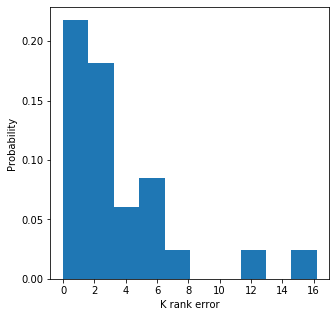

In [24]:
ans_1 = []
for elem in y_pred-y_test:
    ans_1.append((elem**2)**0.5)
    
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward = True)
plt.hist(ans_1, bins =10, density=True)
plt.xlabel("K rank error")
plt.ylabel("Probability")

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test, squared=False)

5.069080650757975

In [26]:
model.coef_

array([ 1.37552952, -0.84881187,  0.        ,  0.96406843, -0.01571891,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.91436976,  0.        , -0.        ,
        0.32947518, -0.60038923, -0.07057824])

In [27]:
ans = []
for elem in y_pred_all-y:
    ans.append((elem**2)**0.5)

Text(0.5, 1.0, 'Distribution of error of Linear predictor')

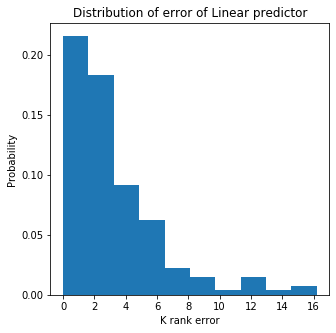

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward = True)
plt.hist(ans, bins =10, density=True)
plt.xlabel("K rank error")
plt.ylabel("Probability")
plt.title("Distribution of error of Linear predictor")

In [29]:
test_y = model.predict(X_test)
train_y = model.predict(X_train)

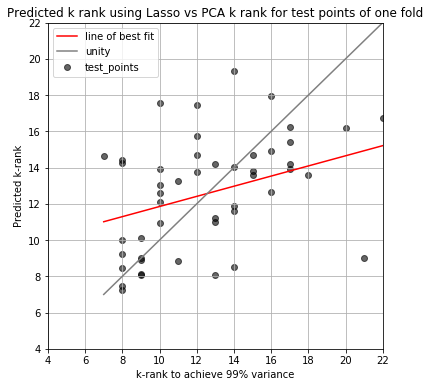

In [30]:
fig, ax = plt.subplots()
plt.grid()
fig.set_size_inches(6, 6, forward = True)

plt.scatter(y_test,test_y, color='black', alpha=0.6, label = 'test_points')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, test_y, 1))(np.unique(y_test)), color="red",label='line of best fit')
plt.plot(np.arange(min(y_test),max(y_test)+1,1), np.arange(min(y_test),max(y_test)+1,1), color="grey", label='unity')
plt.xlim(4,22)
plt.ylim(4,22)
plt.ylabel("Predicted k-rank")
plt.xlabel("k-rank to achieve 99% variance")
plt.title("Predicted k rank using Lasso vs PCA k rank for test points of one fold")
plt.legend()

In [31]:
sklearn.metrics.r2_score(y_test,test_y)

0.2271537263494181

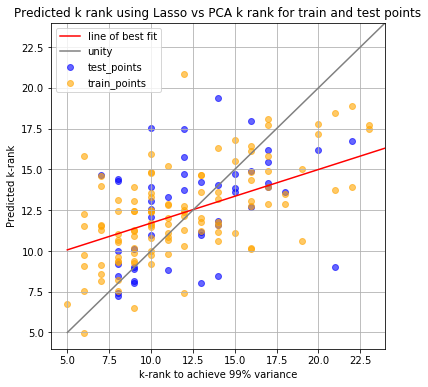

In [32]:
fig, ax = plt.subplots()
plt.grid()
fig.set_size_inches(6, 6, forward = True)

plt.scatter(y_test,test_y, color='blue', alpha=0.6, label = "test_points")
plt.scatter(y_train,train_y,  color='orange', alpha=0.6,label = "train_points")

plt.plot(np.unique(y), np.poly1d(np.polyfit(y, y_pred_all, 1))(np.unique(y)), color="red", label='line of best fit')
plt.plot(np.arange(min(y),max(y),1), np.arange(min(y),max(y),1), color="grey", label='unity')
plt.xlim(4,24)
plt.ylim(4,24)
plt.ylabel("Predicted k-rank")
plt.xlabel("k-rank to achieve 99% variance")
plt.title("Predicted k rank using Lasso vs PCA k rank for train and test points")
plt.legend()

In [378]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import KFold, cross_validate

scorer = make_scorer(r2_score)

reslts = []
for i in np.arange(0.1,0.4, 0.1):
    model = sklearn.linear_model.Lasso(alpha=i, max_iter=1000)
    kf = KFold(n_splits=4, shuffle=False)
    results = sklearn.model_selection.cross_val_score(model, X,y, scoring=scorer, cv=kf)
    print(results.mean())

0.1626330053242706
0.1519655421947622
0.12930802926747859
0.10351893945170693


In [379]:
df_new = df_new.reset_index()

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

In [381]:
pred = []
actual = []
indices = []
for i in range(2000):
    X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y,df_new.index, test_size=0.3, shuffle = True)
    model = sklearn.linear_model.Lasso(alpha=0.27)
    model.fit(X_train, y_train)
    test_y = model.predict(X_test)
    if (len(pred) == 0):
        pred = test_y.tolist()
        actual = y_test.tolist()
        indices = id_test.tolist()
    else:
        pred = pred+test_y.tolist()
        actual = actual+y_test.tolist()
        indices = indices + id_test.tolist()

In [382]:
results = []
for i in range(len(pred)):
    new_result = abs(pred[i]-actual[i])
    if (new_result > 6):
        row = df_new.iloc[indices[i]]
        results.append(row['bbp_name'])

In [383]:
df_count = pd.DataFrame(np.array(results), columns = list("a"))

Text(0.5, 1.0, 'Frequency at which cell has been predicted with significant error (more than 6 k rank differnce)')

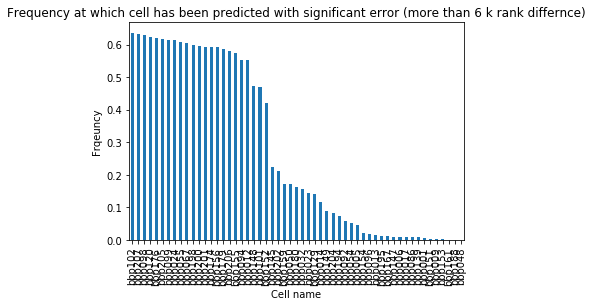

In [386]:
(df_count['a'].value_counts()/1000).plot(kind='bar')
plt.ylabel('Frqeuncy')
plt.xlabel('Cell name')
plt.title('Frequency at which cell has been predicted with significant error (more than 6 k rank differnce)')

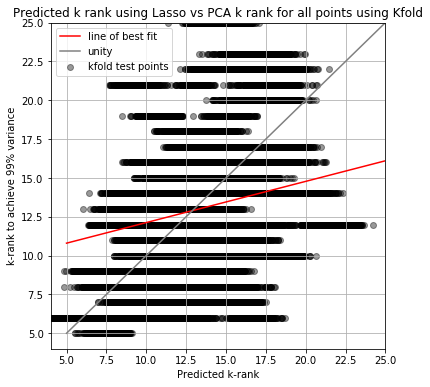

In [387]:
fig, ax = plt.subplots()
plt.grid()
fig.set_size_inches(6, 6, forward = True)

plt.scatter(pred, actual, color='black', alpha=0.4, label = 'kfold test points')
plt.plot(np.unique(actual), np.poly1d(np.polyfit(actual, pred, 1))(np.unique(actual)), color="red",label='line of best fit')
plt.plot(np.arange(min(actual),max(actual),1), np.arange(min(actual),max(actual),1), color="grey", label='unity')
plt.xlim(4,25)
plt.ylim(4,25)
plt.xlabel("Predicted k-rank")
plt.ylabel("k-rank to achieve 99% variance")
plt.title("Predicted k rank using Lasso vs PCA k rank for all points using Kfold")
plt.legend()

In [388]:
results = []
for i in range(len(pred)):
    new_result = abs(pred[i]-actual[i])
    if (new_result > 5):
        results.append(df.iloc[indices[i]]['bbp_name'])

In [389]:
sklearn.metrics.r2_score(actual,pred)

0.25378585996079506

In [390]:
ans = []
for elem in np.asarray(actual)-np.asarray(pred):
    ans.append((elem**2)**0.5)

Text(0.5, 1.0, 'Distribution of error of Linear predictor')

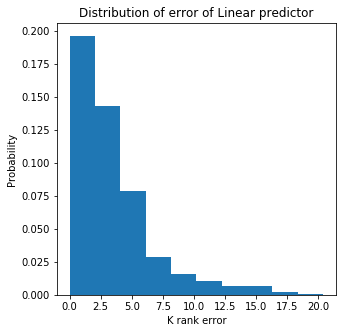

In [391]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward = True)
plt.hist(ans, bins =10, density=True)
plt.xlabel("K rank error")
plt.ylabel("Probability")
plt.title("Distribution of error of Linear predictor")

In [392]:
vals = ['binned_complexity', 'horizontal_complexity',
    'length_soma', 'avg_length_dendrite', 'avg_length_axon',
       'total_length_dendrite', 'total_length_axon', 'length_dendrite_var',
       'length_axon_var', 'count_axon', 'count_dendrite',
       'avg_diameter_dendrite', 'avg_diameter_axon', 'var_diameter_dendrite',
       'var_diameter_axon', 'm_type', 'e_type',"level"]
tracker = {}
for i in range(len(vals)):
    tracker[vals[i]] = model.coef_[i]

In [393]:
tracker

{'binned_complexity': 0.606547290517288,
 'horizontal_complexity': -0.0,
 'length_soma': 0.0,
 'avg_length_dendrite': 0.9302551491021759,
 'avg_length_axon': 0.0,
 'total_length_dendrite': 0.0,
 'total_length_axon': 0.0,
 'length_dendrite_var': 0.0,
 'length_axon_var': 0.0,
 'count_axon': 0.0,
 'count_dendrite': -0.0,
 'avg_diameter_dendrite': -0.0,
 'avg_diameter_axon': -0.7440983036469883,
 'var_diameter_dendrite': 0.0,
 'var_diameter_axon': 0.0,
 'm_type': 0.24028778164064363,
 'e_type': -0.59495097982408,
 'level': -0.05071197642306252}

In [394]:
lst = []
for key in tracker:
    if tracker[key] != 0:
        lst.append(key)

In [395]:
lst

['binned_complexity',
 'avg_length_dendrite',
 'avg_diameter_axon',
 'm_type',
 'e_type',
 'level']

In [141]:
{'binned_complexity': 1.1732292130296766,
 'horizontal_complexity': -0.0,
 'length_soma': 0.6310084122189126,
 'avg_length_dendrite': 0.0,
 'avg_length_axon': 0.3897066100894792,
 'total_length_dendrite': 0.0,
 'total_length_axon': 0.0,
 'length_dendrite_var': 0.10594634575139979,
 'length_axon_var': 0.0,
 'count_axon': 0.0,
 'count_dendrite': -0.0,
 'avg_diameter_dendrite': 0.0,
 'avg_diameter_axon': -0.29494013683219483,
 'var_diameter_dendrite': 0.0,
 'var_diameter_axon': 0.39398647087609723,
 'm_type': -0.006191114865201078,
 'e_type': -0.663307312596713,
 'level': 0.15430407254277956}

{'binned_complexity': 1.1732292130296766,
 'horizontal_complexity': -0.0,
 'length_soma': 0.6310084122189126,
 'avg_length_dendrite': 0.0,
 'avg_length_axon': 0.3897066100894792,
 'total_length_dendrite': 0.0,
 'total_length_axon': 0.0,
 'length_dendrite_var': 0.10594634575139979,
 'length_axon_var': 0.0,
 'count_axon': 0.0,
 'count_dendrite': -0.0,
 'avg_diameter_dendrite': 0.0,
 'avg_diameter_axon': -0.29494013683219483,
 'var_diameter_dendrite': 0.0,
 'var_diameter_axon': 0.39398647087609723,
 'm_type': -0.006191114865201078,
 'e_type': -0.663307312596713,
 'level': 0.15430407254277956}

In [420]:
pred = []
actual = []
from sklearn.model_selection import KFold, cross_validate
kf = KFold(n_splits=4, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = sklearn.linear_model.Lasso(alpha=0.3)
    model.fit(X_train, y_train)
    test_y = model.predict(X_test)
    if (len(pred) == 0):
        pred = test_y.tolist()
        actual = y_test.tolist()
    else:
        pred = pred+test_y.tolist()
        actual = actual+y_test.tolist()

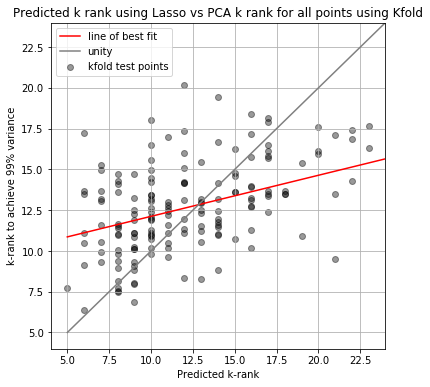

In [421]:
fig, ax = plt.subplots()
plt.grid()
fig.set_size_inches(6, 6, forward = True)

plt.scatter(actual,pred, color='black', alpha=0.4, label = 'kfold test points')
plt.plot(np.unique(actual), np.poly1d(np.polyfit(actual, pred, 1))(np.unique(actual)), color="red",label='line of best fit')
plt.plot(np.arange(min(actual),max(actual),1), np.arange(min(actual),max(actual),1), color="grey", label='unity')
plt.xlim(4,24)
plt.ylim(4,24)
plt.xlabel("Predicted k-rank")
plt.ylabel("k-rank to achieve 99% variance")
plt.title("Predicted k rank using Lasso vs PCA k rank for all points using Kfold")
plt.legend()

In [422]:
sklearn.metrics.r2_score(actual,pred)

0.24492961225305387

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)
model = sklearn.linear_model.HuberRegressor(max_iter = 100000,alpha=3, epsilon=1.8)
model.fit(X_train, y_train)
test_y = model.predict(X_test)
y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test, squared=False)

5.124218328590407

Text(0, 0.5, 'Probability')

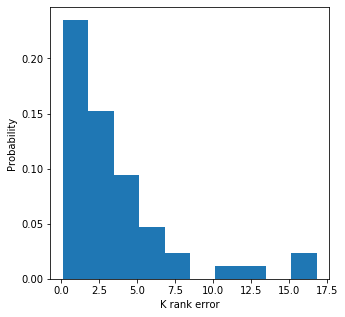

In [424]:
ans_1 = []
for elem in y_pred-y_test:
    ans_1.append((elem**2)**0.5)
    
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward = True)
plt.hist(ans_1, bins =10, density=True)
plt.xlabel("K rank error")
plt.ylabel("Probability")

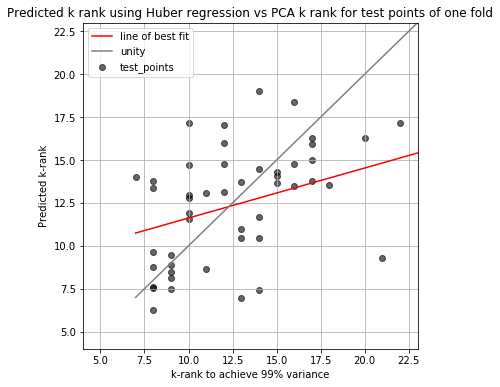

In [425]:
fig, ax = plt.subplots()
plt.grid()
fig.set_size_inches(6, 6, forward = True)

plt.scatter(y_test,test_y, color='black', alpha=0.6, label = 'test_points')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, test_y, 1))(np.unique(y_test)), color="red",label='line of best fit')
plt.plot(np.arange(min(y_test),max(y_test)+1,1), np.arange(min(y_test),max(y_test)+1,1), color="grey", label='unity')
plt.xlim(4,23)
plt.ylim(4,23)
plt.ylabel("Predicted k-rank")
plt.xlabel("k-rank to achieve 99% variance")
plt.title("Predicted k rank using Huber regression vs PCA k rank for test points of one fold")
plt.legend()

In [426]:
vals = ['binned_complexity', 'horizontal_complexity',
    'length_soma', 'avg_length_dendrite', 'avg_length_axon',
       'total_length_dendrite', 'total_length_axon', 'length_dendrite_var',
       'length_axon_var', 'count_axon', 'count_dendrite',
       'avg_diameter_dendrite', 'avg_diameter_axon', 'var_diameter_dendrite',
       'var_diameter_axon', 'm_type', 'e_type',"level"]
tracker = {}
for i in range(len(vals)):
    tracker[vals[i]] = round(model.coef_[i],2)

In [427]:
tracker

{'binned_complexity': 1.96,
 'horizontal_complexity': -1.09,
 'length_soma': 0.41,
 'avg_length_dendrite': 0.46,
 'avg_length_axon': -0.14,
 'total_length_dendrite': 0.14,
 'total_length_axon': 0.11,
 'length_dendrite_var': 0.41,
 'length_axon_var': -0.04,
 'count_axon': 0.09,
 'count_dendrite': -0.23,
 'avg_diameter_dendrite': -0.08,
 'avg_diameter_axon': -0.51,
 'var_diameter_dendrite': 0.19,
 'var_diameter_axon': 0.1,
 'm_type': 0.3,
 'e_type': -0.66,
 'level': -0.02}

In [428]:
pred = []
actual = []
from sklearn.model_selection import KFold, cross_validate
kf = KFold(n_splits=4, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = sklearn.linear_model.HuberRegressor(max_iter = 100000,alpha=3, epsilon=1.8)
    model.fit(X_train, y_train)
    test_y = model.predict(X_test)
    if (len(pred) == 0):
        pred = test_y.tolist()
        actual = y_test.tolist()
    else:
        pred = pred+test_y.tolist()
        actual = actual+y_test.tolist()

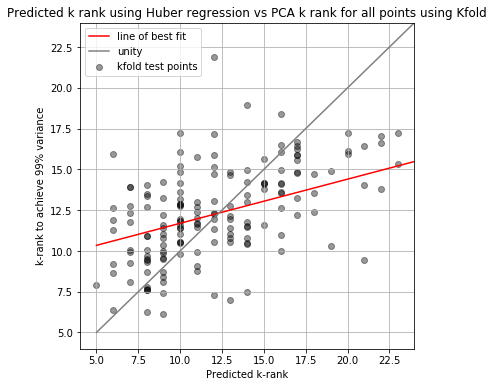

In [429]:
fig, ax = plt.subplots()
plt.grid()
fig.set_size_inches(6, 6, forward = True)

plt.scatter(actual,pred, color='black', alpha=0.4, label = 'kfold test points')
plt.plot(np.unique(actual), np.poly1d(np.polyfit(actual, pred, 1))(np.unique(actual)), color="red",label='line of best fit')
plt.plot(np.arange(min(actual),max(actual),1), np.arange(min(actual),max(actual),1), color="grey", label='unity')
plt.xlim(4,24)
plt.ylim(4,24)
plt.xlabel("Predicted k-rank")
plt.ylabel("k-rank to achieve 99% variance")
plt.title("Predicted k rank using Huber regression vs PCA k rank for all points using Kfold")
plt.legend()

In [430]:
sklearn.metrics.r2_score(actual,pred)

0.2630081276366878

In [33]:
X_1 = dataframe[['binned_complexity','length_soma','avg_length_dendrite','avg_length_axon','total_length_dendrite','length_axon_var','avg_diameter_axon',
 'var_diameter_axon',
 'm_type',
 'e_type',
 'levels']]

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_1.values, y, test_size=0.3, shuffle = False)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [399]:
clf = RandomForestClassifier(n_estimators= 4500,
 min_samples_leaf = 3,                
 max_depth = 4,
max_features = 5,)

In [400]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [215]:
y_pred = clf.predict(X_test)

In [216]:
mean_squared_error(y_pred, y_test, squared=False)

3.6713984619851145

In [129]:
y_pred_all = clf.predict(X)
mean_squared_error(y_pred_all, y, squared=False)

3.596707623992264

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8],
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    7.2s finished


{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}

In [217]:
test_y = clf.predict(X_test)
train_y = clf.predict(X_train)

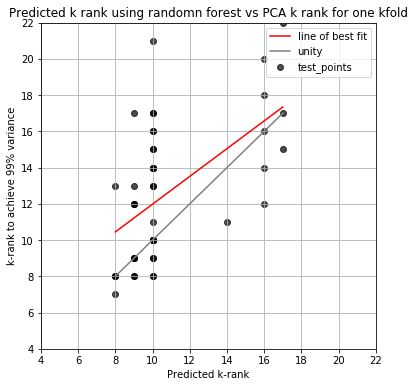

In [218]:
fig, ax = plt.subplots()
plt.grid()
fig.set_size_inches(6, 6, forward = True)

plt.scatter(test_y, y_test, color='black', alpha=0.7, label = 'test_points')
plt.plot(np.unique(test_y), np.poly1d(np.polyfit(test_y, y_test, 1))(np.unique(test_y)), color="red",label='line of best fit')
plt.plot(np.arange(min(test_y),max(test_y)+1,1), np.arange(min(test_y),max(test_y)+1,1), color="grey", label='unity')
plt.xlim(4,22)
plt.ylim(4,22)
plt.xlabel("Predicted k-rank")
plt.ylabel("k-rank to achieve 99% variance")
plt.title("Predicted k rank using randomn forest vs PCA k rank for one kfold")
plt.legend()

In [219]:
sklearn.metrics.r2_score(y_test,test_y)

0.03994064548040077

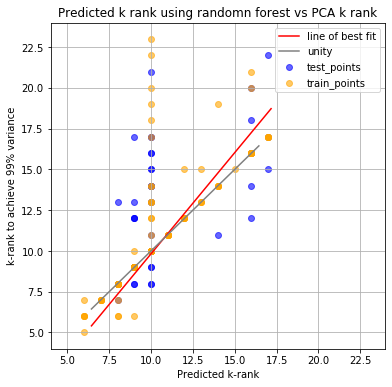

In [220]:
fig, ax = plt.subplots()
plt.grid()
fig.set_size_inches(6, 6, forward = True)

plt.scatter(test_y, y_test, color='blue', alpha=0.6, label = "test_points")
plt.scatter(train_y, y_train, color='orange', alpha=0.6,label = "train_points")


plt.plot(np.unique(y_pred_all), np.poly1d(np.polyfit(y_pred_all, y, 1))(np.unique(y_pred_all)), color="red", label='line of best fit')
plt.plot(np.arange(min(y_pred_all),max(y_pred_all),1), np.arange(min(y_pred_all),max(y_pred_all),1), color="grey", label='unity')
plt.xlim(4,24)
plt.ylim(4,24)
plt.xlabel("Predicted k-rank")
plt.ylabel("k-rank to achieve 99% variance")
plt.title("Predicted k rank using randomn forest vs PCA k rank")
plt.legend()

In [221]:
sklearn.metrics.r2_score(y,y_pred_all)

0.41827286883127945

In [401]:
X_t = X_1.reset_index().copy()

In [402]:
X_t = X_t.drop(columns=['bbp_name'])

In [403]:
X_t.head()

,binned_complexity,length_soma,avg_length_dendrite,avg_length_axon,total_length_dendrite,length_axon_var,avg_diameter_axon,var_diameter_axon,m_type,e_type,levels
0,-0.928290,1.523045,-0.566269,-0.255920,-0.467796,-0.941552,-1.147011,-0.685431,0.0,0.0,5.0
1,0.192310,-0.476468,-0.523939,-1.227730,0.978940,-1.076269,0.352921,-1.067419,10.0,5.0,4.0
2,2.999859,0.158037,1.751512,-0.300032,1.029699,0.516155,-0.577071,0.326147,9.0,0.0,6.0
3,0.498499,0.158037,1.751512,-0.300032,1.029699,0.516155,-0.577071,0.326147,2.0,5.0,6.0
4,-0.596847,1.523045,-0.566269,-0.255920,-0.467796,-0.941552,-1.147011,-0.685431,11.0,6.0,5.0


In [108]:
X_1 = dataframe[['binned_complexity','length_soma','avg_length_dendrite','avg_length_axon','total_length_dendrite','length_axon_var','avg_diameter_axon',
 'var_diameter_axon']].values

In [109]:
pred = []
actual = []
from sklearn.model_selection import KFold, cross_validate
kf = KFold(n_splits=4, shuffle=False)
i = 0
for train_index, test_index in kf.split(X_1):
    X_train, X_test = X_1[train_index.tolist()], X_1[test_index.tolist()]
    y_train, y_test = y[train_index], y[test_index]
    model = clf = RandomForestRegressor(n_estimators= 4500,
 min_samples_leaf = 3,                
 max_depth = 4,
max_features = 5,)
    model.fit(X_train, y_train)
    test_y = model.predict(X_test)
    if (len(pred) == 0):
        pred = test_y.tolist()
        actual = y_test.tolist()
    else:
        pred = pred+test_y.tolist()
        actual = actual+y_test.tolist()

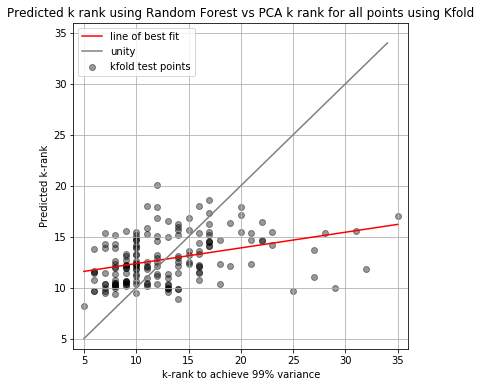

In [110]:
fig, ax = plt.subplots()
plt.grid()
fig.set_size_inches(6, 6, forward = True)

plt.scatter(actual,pred, color='black', alpha=0.4, label = 'kfold test points')
plt.plot(np.unique(actual), np.poly1d(np.polyfit(actual, pred, 1))(np.unique(actual)), color="red",label='line of best fit')
plt.plot(np.arange(min(actual),max(actual),1), np.arange(min(actual),max(actual),1), color="grey", label='unity')
plt.xlim(4,36)
plt.ylim(4,36)
plt.ylabel("Predicted k-rank")
plt.xlabel("k-rank to achieve 99% variance")
plt.title("Predicted k rank using Random Forest vs PCA k rank for all points using Kfold")
plt.legend()

In [111]:
sklearn.metrics.r2_score(actual,pred)

0.12221823006897403

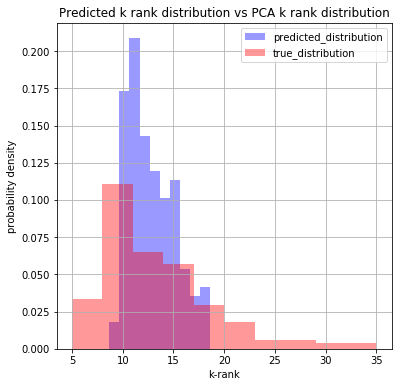

In [83]:
fig, ax = plt.subplots()
plt.grid()
plt.xlabel("k-rank")
plt.ylabel("probability density")
plt.title("Predicted k rank distribution vs PCA k rank distribution")
fig.set_size_inches(6, 6, forward = True)
plt.hist(pred, color='blue',alpha=0.4, label='predicted_distribution',bins =10, density=True)
plt.hist(actual, color='red',alpha=0.4, label='true_distribution',bins =10, density=True)
plt.legend()

In [84]:
len(clf.feature_importances_)

15

In [85]:
vals = ['binned_complexity', 'horizontal_complexity',
    'length_soma', 'avg_length_dendrite', 'avg_length_axon',
       'total_length_dendrite', 'total_length_axon', 'length_dendrite_var',
       'length_axon_var', 'count_axon', 'count_dendrite',
       'avg_diameter_dendrite', 'avg_diameter_axon', 'var_diameter_dendrite',
       'var_diameter_axon']
tracker = {}
for i in range(len(vals)):
    tracker[vals[i]] = round(clf.feature_importances_[i],2)

In [86]:
tracker

{'binned_complexity': 0.32,
 'horizontal_complexity': 0.29,
 'length_soma': 0.06,
 'avg_length_dendrite': 0.04,
 'avg_length_axon': 0.02,
 'total_length_dendrite': 0.05,
 'total_length_axon': 0.02,
 'length_dendrite_var': 0.05,
 'length_axon_var': 0.02,
 'count_axon': 0.02,
 'count_dendrite': 0.01,
 'avg_diameter_dendrite': 0.01,
 'avg_diameter_axon': 0.06,
 'var_diameter_dendrite': 0.05,
 'var_diameter_axon': 0.01}

In [145]:
sum(clf.feature_importances_)

1.0

In [772]:
from sklearn.model_selection import KFold, cross_validate

n_splits = 5
p = 0
val = 0
kf = KFold(n_splits=n_splits, shuffle=True)
curr_best = 100000
for i in np.arange(1,10,1):
    model = RandomForestClassifier(n_estimators= 150,
 min_samples_split = 3,
 min_samples_leaf = 3,
 max_depth = i,
max_features = 'auto',)
    scoring=('r2', 'neg_root_mean_squared_error')
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
    print(abs(np.mean(cv_results['test_r2'])))

0.1679549691888984
0.14414930825430605
0.03031337145499602
0.06705413510780511
0.051306051212131235
0.09159957224038795
0.05660283389124856
0.07423691271424378
0.021156887566601324
